# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2302 АндреевАМ

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [ ]:
def incidence_to_adjacency(mtrx):
    v = len(mtrx)
    e = len(mtrx[0])
    adj_matrix = [[0 for _ in range(v)] for _ in range(v)]
    for edge_idx in range(e):
        start = end = None
        weight = 0
        for vertex_idx in range(v):
            val = mtrx[vertex_idx][edge_idx]
            if val > 0:
                start = vertex_idx
                weight = val
            elif val < 0:
                end = vertex_idx
        if start is not None and end is not None:
            adj_matrix[start][end] = weight
    return adj_matrix

In [ ]:
def floyd_warshall(graph,start,end):
    n = len(graph)
    INF = float('inf')
    dist = [[INF if i != j and graph[i][j] == 0 else graph[i][j] for j in range(n)] for i in range(n)]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist[start][end] if dist[start][end] != INF else None

In [ ]:
def dijkstra(graph, start, end):
    n = len(graph)
    INF = float('inf')
    dist = [INF] * n
    visited = [False] * n
    dist[start] = 0
    for _ in range(n):
        u = -1
        min_dist = INF
        for i in range(n):
            if not visited[i] and dist[i] < min_dist:
                min_dist = dist[i]
                u = i
        if u == -1:  
            break
        visited[u] = True
        for v in range(n):
            weight = graph[u][v]
            if weight > 0 and not visited[v]:
                if dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight
    return dist[end] if dist[end] != INF else None

In [ ]:
def bellman_ford(graph, start, end):
    V = len(graph)
    INF = float('inf')
    dist = [INF] * V  
    dist[start] = 0
    for _ in range(V - 1): 
        for i in range(V):
            for j in range(V):
                if graph[i][j] != 0 and dist[i] + graph[i][j] < dist[j]:
                    dist[j] = dist[i] + graph[i][j]
    for i in range(V):
        for j in range(V):
            if graph[i][j] != 0 and dist[i] + graph[i][j] < dist[j]:
                return None
    return dist[end] if dist[end] != INF else None
graph = [
    [0, 3, 0, 5],
    [2, 0, 0, 4],
    [0, 1, 0, 0],
    [0, 0, 2, 0]]
print(bellman_ford(graph,0,2))

In [ ]:
import heapq
INF = float('inf')
def bellman_ford(graph, src):
    V = len(graph)
    dist = [INF] * V
    dist[src] = 0
    for _ in range(V):
        for u in range(V):
            for v, weight in enumerate(graph[u]):
                if weight != INF and dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight
    return dist

def dijkstra(graph, start, adj):
    V = len(graph)
    dist = [INF] * V
    dist[start] = 0
    pq = [(0, start)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, weight in adj[u]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                heapq.heappush(pq, (dist[v], v))
    return dist

def johnson(graph):
    V = len(graph)
    for i in range(V):
        graph.append([0] * V)
    h = bellman_ford(graph, V)
    new_adj = [[] for _ in range(V)]
    for u in range(V):
        for v in range(V):
            if graph[u][v] != INF:
                new_w = graph[u][v] + h[u] - h[v]
                new_adj[u].append((v, new_w))
    dist_matrix = []
    for u in range(V):
        dist_u = dijkstra(graph, u, new_adj)
        dist_u = [d - h[u] + h[v] if d != INF else INF for v, d in enumerate(dist_u)]
        dist_matrix.append(dist_u)
    return dist_matrix

In [ ]:
from collections import deque
def levit(graph, start):
    V = len(graph)
    INF = float('inf')
    dist = [INF] * V
    prev = [None] * V
    m0, m1, m2 = set(), deque(), set()
    dist[start] = 0
    m1.append(start)
    while m1:
        u = m1.popleft()
        m0.discard(u)
        for v in range(V):
            w = graph[u][v]
            if w == INF or u == v:
                continue
            if v not in m0 and v not in m1 and v not in m2:
                dist[v] = dist[u] + w
                prev[v] = u
                m1.append(v)
            elif v in m1 and dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
            elif v in m2 and dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                m1.appendleft(v)
                m2.remove(v)
        m2.add(u)
    return dist, prev

In [ ]:
from copy import *
def dijkstra_path(graph, start, end):
    V = len(graph)
    dist = [INF] * V
    prev = [None] * V
    dist[start] = 0
    queue = [(0, start)]
    while queue:
        d, u = heapq.heappop(queue)
        if u == end:
            break
        if d > dist[u]:
            continue
        for v, weight in enumerate(graph[u]):
            if weight != INF and dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                prev[v] = u
                heapq.heappush(queue, (dist[v], v))
    path = []
    node = end
    while node is not None:
        path.append(node)
        node = prev[node]
    return path[::-1], dist[end]

def yen(graph, start, end, k):
    A = []
    B = []
    path, cost = dijkstra_path(graph, start, end)
    if not path or cost == INF:
        return []
    A.append((cost, path))
    for i in range(1, k):
        for j in range(len(A[i-1][1]) - 1):
            spur_node = A[i-1][1][j]
            root_path = A[i-1][1][:j+1]
            g_copy = deepcopy(graph)
            for cost_path, p in A:
                if p[:j+1] == root_path and len(p) > j+1:
                    u, v = p[j], p[j+1]
                    g_copy[u][v] = INF
            for node in root_path[:-1]:
                for v in range(len(g_copy)):
                    g_copy[node][v] = INF
            spur_path, spur_cost = dijkstra_path(g_copy, spur_node, end)
            if spur_path and spur_cost != INF:
                total_path = root_path[:-1] + spur_path
                total_cost = sum(graph[total_path[i]][total_path[i+1]] for i in range(len(total_path) - 1))
                if (total_cost, total_path) not in B:
                    B.append((total_cost, total_path))
        if not B:
            break
        B.sort()
        A.append(B.pop(0))
    return A

In [ ]:
def print_complexity_table(vertices, edges):
    print(f"{'Algorithm':<25} | {'Time complexity (O)':<25} | Example for V={vertices}, E={edges}")
    print("-" * 80)
    algorithms = [
        {
            "name": "Dijkstra",
            "complexity": "O(E + V log V)",
            "example": f"O({edges} + {vertices} log {vertices})"
        },
        {
            "name": "Floyd-Warshall",
            "complexity": "O(V³)",
            "example": f"O({vertices}³) = O({vertices**3})"
        },
        {
            "name": "Bellman-Ford",
            "complexity": "O(VE)",
            "example": f"O({vertices}*{edges}) = O({vertices*edges})"
        },
        {
            "name": "Johnson",
            "complexity": "O(V² log V + VE)",
            "example": f"O({vertices}² log {vertices} + {vertices*edges})"
        },
        {
            "name": "Levit",
            "complexity": "O(V²E)",
            "example": f"O({vertices}²*{edges}) = O({vertices**2*edges})"
        },
        {
            "name": "Yen",
            "complexity": "O(kV(E + V log V))",
            "example": f"O(k*{vertices}*({edges} + {vertices} log {vertices}))"
        }
    ]
    for algo in algorithms:
        print(f"{algo['name']:<25} | {algo['complexity']:<25} | {algo['example']}")

def userInput(prompt, default):
    u = input(prompt)
    return str(u) if u.strip() else default

if __name__ == "__main__":
    print("Time complexity analisys")
    print("------------------------------------")
    V = int(userInput("Input vertice count (V): ", 5))
    E = int(userInput("Input edge count (E): ", 5))
    print_complexity_table(V, E)

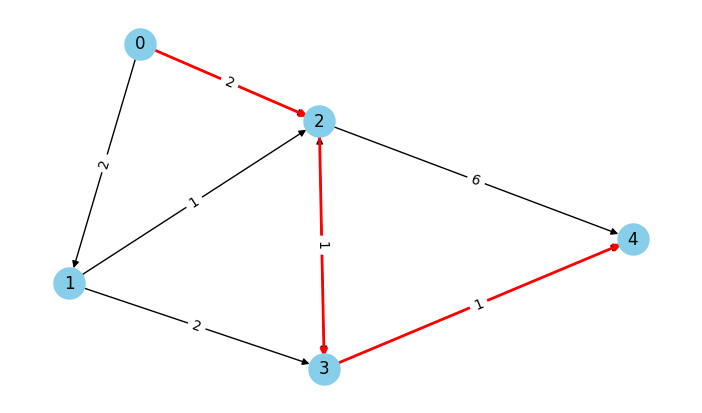

In [1]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import ast
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class GraphApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Graph analyzer")
        self.root.geometry("900x700")
        self.G = nx.DiGraph()
        self.graph_data = None
        self.figure = plt.figure(figsize=(8, 6))
        self.create_widgets()
    
    def create_widgets(self):
        input_frame = ttk.LabelFrame(self.root, text="Input graph", padding=10)
        input_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)
        ttk.Label(input_frame, text="Matrix type:").grid(row=0, column=0, sticky=tk.W)
        self.matrix_type = tk.StringVar(value="adjacency")
        ttk.Radiobutton(input_frame, text="Adjacency matrix", 
                       variable=self.matrix_type, value="adjacency").grid(row=0, column=1, sticky=tk.W)
        ttk.Radiobutton(input_frame, text="Incidence matrix", 
                       variable=self.matrix_type, value="incidence").grid(row=0, column=2, sticky=tk.W)
        self.text_input = tk.Text(input_frame, height=10, width=50, font=('Courier New', 10))
        self.text_input.grid(row=1, column=0, columnspan=3, pady=5)
        ttk.Button(input_frame, text="Example", command=self.insert_example).grid(row=2, column=0, pady=5)
        ttk.Button(input_frame, text="Load from file", command=self.load_from_file).grid(row=2, column=1, pady=5)
        ttk.Button(input_frame, text="Continue", command=self.accept_graph).grid(row=2, column=2, pady=5)
        analysis_frame = ttk.LabelFrame(self.root, text="Analysis", padding=10)
        analysis_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)
        ttk.Label(analysis_frame, text="Algorithm:").grid(row=0, column=0, sticky=tk.W)
        self.algorithm = tk.StringVar(value="dijkstra")
        algorithms = [("Dijkstra", "dijkstra"), ("Floyd-Warshall", "floyd"),
                     ("Bellman-Ford", "bellman"), ("Johnson", "johnson")]
        for i, (text, val) in enumerate(algorithms):
            ttk.Radiobutton(analysis_frame, text=text, variable=self.algorithm, 
                           value=val).grid(row=0, column=i+1, sticky=tk.W)
        ttk.Label(analysis_frame, text="Start vertex:").grid(row=1, column=0, sticky=tk.W)
        self.start_node = ttk.Entry(analysis_frame, width=5)
        self.start_node.grid(row=1, column=1, sticky=tk.W)
        ttk.Label(analysis_frame, text="End vertex:").grid(row=1, column=2, sticky=tk.W)
        self.end_node = ttk.Entry(analysis_frame, width=5)
        self.end_node.grid(row=1, column=3, sticky=tk.W)
        ttk.Button(analysis_frame, text="Search path", command=self.find_path).grid(row=1, column=4, padx=5)
        ttk.Button(analysis_frame, text="Visualize", command=self.visualize_graph).grid(row=1, column=5, padx=5)
        result_frame = ttk.LabelFrame(self.root, text="Results", padding=10)
        result_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)
        self.result_text = tk.Text(result_frame, height=5, width=80)
        self.result_text.pack(fill=tk.BOTH, expand=True)
        self.canvas = FigureCanvasTkAgg(self.figure, master=result_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    
    def insert_example(self):
        example = """# Example adjacency matrix (3 verts)
[[0, 2, 0],
 [0, 0, 3],
 [0, 0, 0]]

# Example incidence matrix (3 verts, 2 edges)
[[1, 0],
 [1, 1],
 [0, 1]]"""
        self.text_input.delete(1.0, tk.END)
        self.text_input.insert(tk.END, example)
    def load_from_file(self):
        filepath = filedialog.askopenfilename(filetypes=[("Text files", "*.txt"), ("All files", "*.*")])
        if filepath:
            try:
                with open(filepath, 'r') as file:
                    content = file.read()
                    self.text_input.delete(1.0, tk.END)
                    self.text_input.insert(tk.END, content)
            except Exception as e:
                messagebox.showerror("Error", f"Couldn't load file: {e}")
    
    def accept_graph(self):
        try:
            text = self.text_input.get(1.0, tk.END).strip()
            cleaned_lines = []
            for line in text.split('\n'):
                if not line.strip().startswith('#'):
                    cleaned_lines.append(line)
            cleaned_text = '\n'.join(cleaned_lines)
            self.graph_data = ast.literal_eval(cleaned_text)
            if not isinstance(self.graph_data, list) or not all(isinstance(row, list) for row in self.graph_data):
                raise ValueError("The input must be a nested list (2D array)")
            if self.matrix_type.get() == "adjacency":
                if len(self.graph_data) != len(self.graph_data[0]):
                    raise ValueError("Adjacency matrix must be square (N*N)")
                self.G = nx.DiGraph()
                for i in range(len(self.graph_data)):
                    for j in range(len(self.graph_data[i])):
                        if self.graph_data[i][j] != 0:
                            self.G.add_edge(i, j, weight=self.graph_data[i][j])
            else:
                num_nodes = len(self.graph_data)
                num_edges = len(self.graph_data[0]) if num_nodes > 0 else 0
                self.G = nx.DiGraph()
                for j in range(num_edges):
                    edge = []
                    for i in range(num_nodes):
                        if self.graph_data[i][j] != 0:
                            edge.append((i, self.graph_data[i][j]))
                    if len(edge) == 2:
                        self.G.add_edge(edge[0][0], edge[1][0], weight=edge[1][1])
            messagebox.showinfo("Success", f"Graph loaded\nVerts: {len(self.G.nodes())}\nEdges: {len(self.G.edges())}")
        except Exception as e:
            messagebox.showerror("Error", f"Invalid input data: {e}")
    
    def visualize_graph(self):
        if len(self.G.nodes()) == 0:
            messagebox.showerror("Error", "Graph not loaded or empty")
            return
        self.figure.clear()
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, node_color='skyblue', 
                node_size=500, arrows=True, ax=self.figure.add_subplot(111))
        labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        self.canvas.draw()
    
    def find_path(self):
        if len(self.G.nodes()) == 0:
            messagebox.showerror("Error", "Graph not loaded")
            return
        try:
            start = int(self.start_node.get())
            end = int(self.end_node.get())
            if start not in self.G.nodes() or end not in self.G.nodes():
                raise ValueError("Vertice numbers must in the range of 0..{}".format(len(self.G.nodes())-1))
            algorithm = self.algorithm.get()
            result = ""
            if algorithm == "dijkstra":
                try:
                    path = nx.dijkstra_path(self.G, start, end)
                    length = nx.dijkstra_path_length(self.G, start, end)
                    result = f"Dijkstra\nPath: {path}\nLength: {length}"
                    self.highlight_path(path)
                except nx.NetworkXNoPath:
                    result = "No path found"
            elif algorithm == "floyd":
                try:
                    path = nx.floyd_warshall_predecessor_and_distance(self.G)
                    predecessors = path[0]
                    current = end
                    path_nodes = [current]
                    while current != start:
                        current = predecessors[current][start]
                        path_nodes.append(current)
                    path_nodes.reverse()
                    distance = nx.floyd_warshall_numpy(self.G)[start][end]
                    result = f"Floyd-Warshall\nPath: {path_nodes}\nLength: {distance}"
                    self.highlight_path(path_nodes)
                except:
                    result = "Error"
            
            self.result_text.delete(1.0, tk.END)
            self.result_text.insert(tk.END, result)
            
        except ValueError as e:
            messagebox.showerror("Error", str(e))
    
    def highlight_path(self, path):
        if not path:
            return
        self.figure.clear()
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, node_color='skyblue', 
                node_size=500, arrows=True, ax=self.figure.add_subplot(111))
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(self.G, pos, edgelist=path_edges, 
                              edge_color='r', width=2, ax=self.figure.gca())
        labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = GraphApp(root)
    root.mainloop()

### Вывод